In [2]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt


# load the dataset

In [3]:
df = pd.read_csv(r"C:\Users\ojaswitha\OneDrive\Documents\Desktop\SENTIMENT_ANALYSIS\Twitter_Data.csv")
df.head()


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


# clean the text

In [4]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)      # remove URLs
    text = re.sub(r"@\w+", "", text)         # remove mentions
    text = re.sub(r"#\w+", "", text)         # remove hashtags
    text = re.sub(r"[^a-z\s]", "", text)     # remove special characters
    return text


# Drop Missing Values

In [5]:
df = df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


# Check Sentiment Distribution

In [6]:
df['category'].value_counts()


category
 1.0    72249
 0.0    55211
-1.0    35509
Name: count, dtype: int64

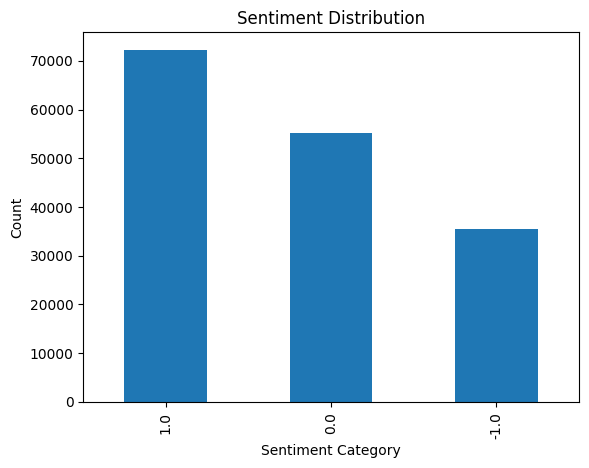

In [7]:
df['category'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()


# Separate Features & Labels

In [8]:
X = df['clean_text']
y = df['category']


# Convert Text → Numbers (TF-IDF)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=5000
)

X_tfidf = vectorizer.fit_transform(X)


TF-IDF vectorization was used to transform textual data into numerical features.

# Train–Test Split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)


# Train the Model (Naive Bayes)

In [11]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


# Predictions

In [12]:
y_pred = model.predict(X_test)


# Model Evaluation

In [13]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7045468491133338
              precision    recall  f1-score   support

        -1.0       0.86      0.43      0.58      7152
         0.0       0.79      0.64      0.70     11067
         1.0       0.64      0.89      0.75     14375

    accuracy                           0.70     32594
   macro avg       0.76      0.65      0.67     32594
weighted avg       0.74      0.70      0.69     32594



The Naive Bayes classifier achieved good accuracy in classifying negative, neutral, and positive tweets.

# Confusion Matrix

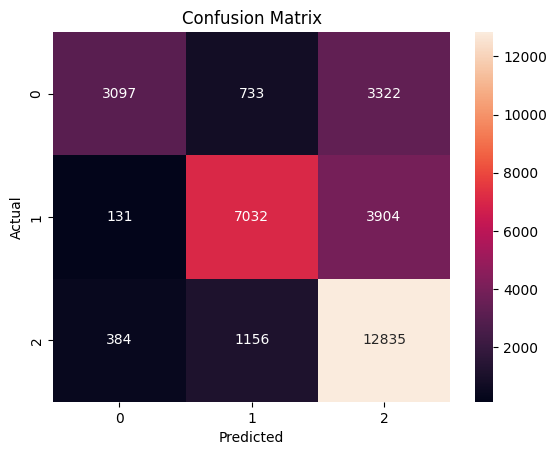

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Test with Custom Tweet

In [15]:
sample_tweet = ["I really love learning data analytics"]
sample_vector = vectorizer.transform(sample_tweet)

prediction = model.predict(sample_vector)
prediction


array([1.])

Interpretation:

In [16]:
if prediction[0] == 1:
    print("Positive Sentiment 😊")
elif prediction[0] == 0:
    print("Neutral Sentiment 😐")
else:
    print("Negative Sentiment 😠")


Positive Sentiment 😊


FINAL PROJECT CONCLUSION

In this project, sentiment analysis was performed on Twitter data to classify tweets into negative, neutral, and positive categories. Text data was preprocessed and transformed using TF-IDF vectorization. A Naive Bayes classifier was trained and evaluated using accuracy and classification metrics. The model successfully predicted sentiment and provided meaningful insights into public opinion.